# Exam 01

## Set-up

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

from matplotlib.ticker import StrMethodFormatter

from datetime import timedelta

import seaborn as sns

# Bring in quandl for downloading data
import quandl
# quandl.ApiConfig.api_key = 'YOUR_KEY_HERE'
quandl.read_key()


## Q1

Check out the warning - if we were doing real work with this data, we'd want to check that out.

In [3]:

housing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')
pricing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/train_2016_v2.csv')


/var/folders/kx/y8vj3n6n5kq_d74vj24jsnh40000gn/T/ipykernel_4613/3194476487.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298522 entries, 0 to 298521
Data columns (total 58 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      298522 non-null  int64  
 1   airconditioningtypeid         81220 non-null   float64
 2   architecturalstyletypeid      0 non-null       float64
 3   basementsqft                  152 non-null     float64
 4   bathroomcnt                   297341 non-null  float64
 5   bedroomcnt                    297341 non-null  float64
 6   buildingclasstypeid           1302 non-null    float64
 7   buildingqualitytypeid         193961 non-null  float64
 8   calculatedbathnbr             285491 non-null  float64
 9   decktypeid                    1670 non-null    float64
 10  finishedfloor1squarefeet      20096 non-null   float64
 11  calculatedfinishedsquarefeet  292951 non-null  float64
 12  finishedsquarefeet12          270833 non-nul

In [5]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         90275 non-null  int64  
 1   logerror         90275 non-null  float64
 2   transactiondate  90275 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [6]:
zillow_data = pd.merge(housing, pricing, how='inner', on='parcelid')

## Q2

In [7]:
zillow_data['transactiondate'] = pd.to_datetime(zillow_data['transactiondate'], format='%Y-%m-%d')

print(zillow_data.transactiondate.min())
print(zillow_data.transactiondate.max())



2016-01-01 00:00:00
2016-12-30 00:00:00


## Q3

In [8]:
zillow_data.groupby('yearbuilt')['parcelid'].agg('count').sort_values(ascending=False).to_frame().head(20)


,parcelid
yearbuilt,
1955.0,234
1989.0,217
1950.0,208
1954.0,206
1973.0,181
1990.0,179
1987.0,173
1964.0,169
1956.0,168


In [9]:

zillow_data.groupby(['regionidcity', 'regionidcounty'])['parcelid'].agg('count').sort_values(ascending=False).to_frame().head(20)


,,parcelid
regionidcity,regionidcounty,
12447.0,3101.0,2019
46298.0,3101.0,267
52650.0,1286.0,220
54311.0,3101.0,218
5534.0,3101.0,199
40227.0,3101.0,192
16764.0,1286.0,178
25218.0,1286.0,173
34278.0,2061.0,156


## Q4

In [10]:
zillow_data.groupby('regionidcity')[['lotsizesquarefeet', 'taxvaluedollarcnt']].agg([np.mean, np.std]).round(2) 

lotsizesquarefeet           taxvaluedollarcnt           
                          mean       std              mean        std
regionidcity                                                         
3491.0                 3274.00       NaN         167870.00        NaN
4406.0                21354.93  64831.90         374480.64  354129.67
5465.0                12382.68  26743.93         306986.80  152973.27
5534.0                18029.74  40321.58         175081.05   92749.42
6021.0                 9531.96   6104.76         239490.11  184029.95
...                        ...       ...               ...        ...
396053.0               5382.22   1262.81         176237.06   79733.15
396054.0              24202.78  75097.30         363721.10  375900.13
396550.0               6313.33    399.48         264204.67  191894.76
396551.0               9476.17   5789.85         357663.56  233136.33
396556.0               6219.94   1006.80         188996.11  124439.51

[168 rows x 4 columns]

In [11]:
zillow_data[zillow_data['poolcnt'] >= 1].groupby('regionidcity')[['bathroomcnt', 'bedroomcnt']].agg([np.mean, np.std]).round(1) 


bathroomcnt      bedroomcnt     
                    mean  std       mean  std
regionidcity                                 
4406.0               3.1  1.7        3.4  1.7
5465.0               2.1  0.3        3.2  0.7
5534.0               2.5  0.7        3.6  0.6
6021.0               2.0  NaN        3.0  NaN
6395.0               1.8  0.4        2.5  1.0
...                  ...  ...        ...  ...
118878.0             1.0  NaN        1.0  NaN
118895.0             1.5  0.7        3.5  0.7
118994.0             3.0  NaN        3.0  NaN
396054.0             3.2  1.4        3.2  1.2
396551.0             2.0  0.7        2.8  0.4

[129 rows x 4 columns]

## Q5

In [12]:
df = zillow_data[['parcelid', 'logerror', 'transactiondate', 'regionidcity']]

dupes = df.duplicated(subset=['parcelid'], keep=False)
non_unique_data = df.loc[dupes]
non_unique_data


,parcelid,logerror,transactiondate,regionidcity
431,14607531,-0.0965,2016-06-23,24832.0
432,14607531,0.0070,2016-08-29,24832.0
1536,14444102,-0.1948,2016-04-29,13693.0
1537,14444102,-0.0812,2016-10-05,13693.0
1952,11122560,-0.0202,2016-02-08,54311.0
1953,11122560,-0.0192,2016-08-16,54311.0
2209,11866315,-0.0010,2016-01-12,54212.0
2210,11866315,0.0488,2016-06-14,54212.0
2755,14621246,-0.0141,2016-05-05,33840.0
2756,14621246,0.0159,2016-12-07,33840.0


In [13]:
zillow_data.insert(loc=0, column='transactionID', value=np.arange(len(df)))
zillow_data

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,119366.0,162212.0,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,324642.0,541069.0,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,167010.0,375907.0,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,232690.0,588746.0,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,392869.0,777041.0,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,271604.0,559101.0,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,152919.0,304640.0,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,51206.0,74870.0,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,166585.0,238968.0,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27


Now, check out the **warning** that I get when I try to create the new column without the `.insert()`. 

In [14]:
zillow_data['transactionID2'] = np.arange(len(zillow_data))
zillow_data

/var/folders/kx/y8vj3n6n5kq_d74vj24jsnh40000gn/T/ipykernel_4613/3624039156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transactionID2'] = np.arange(len(df))


,parcelid,logerror,transactiondate,regionidcity,transactionID2
0,13005045,0.0962,2016-05-18,14111.0,0
1,17279551,0.0020,2016-09-02,34278.0,1
2,12605376,-0.0566,2016-09-28,10723.0,2
3,11713859,0.0227,2016-02-04,12447.0,3
4,17193642,0.0237,2016-06-28,34278.0,4
...,...,...,...,...,...
9066,12653293,-0.0305,2016-03-18,12447.0,9066
9067,11907619,0.0266,2016-03-22,50677.0,9067
9068,14001605,0.0090,2016-06-21,24832.0,9068
9069,12892836,0.0497,2016-07-27,20008.0,9069


## Q6

Let's start with the count table.

In [15]:
counts = zillow_data['regionidcity'].value_counts().to_frame()
counts[counts.regionidcity > 100]

,regionidcity
12447.0,2019
46298.0,267
52650.0,220
54311.0,218
5534.0,199
40227.0,192
16764.0,178
25218.0,173
34278.0,156
12773.0,128


Now, I'll create the new count variable. 

In [16]:
zillow_data['houses_sold'] = zillow_data.groupby('regionidcity')['logerror'].transform('count')

df_screened = zillow_data[zillow_data.houses_sold >= 5].copy()
df_screened 


,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,houses_sold
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,162212.0,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18,25.0
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,541069.0,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,156.0
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,375907.0,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28,40.0
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,588746.0,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2019.0
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,777041.0,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,559101.0,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2019.0
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,304640.0,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22,33.0
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,74870.0,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,112.0
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,238968.0,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,70.0


In [17]:
df_screened['logerror_abs'] = df_screened['logerror'].abs()

df_screened.groupby('regionidcity')['logerror_abs'].agg([np.mean, np.median]).sort_values(by = 'mean', ascending=False).head(10).round(5)


,mean,median
regionidcity,,
36502.0,0.28604,0.11420
52842.0,0.22696,0.07420
17597.0,0.19736,0.02595
56780.0,0.17608,0.06950
29189.0,0.16878,0.14240
27183.0,0.14881,0.05350
46098.0,0.14682,0.06250
47762.0,0.14464,0.05460
39076.0,0.13065,0.05130


In [18]:
# Q7
df1 = zillow_data[['parcelid', 'transactiondate', 'logerror']]
df1['logerror_abs'] = df1['logerror'].abs()
df1

/var/folders/kx/y8vj3n6n5kq_d74vj24jsnh40000gn/T/ipykernel_4613/3032360870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['logerror_abs'] = df1['logerror'].abs()


,parcelid,transactiondate,logerror,logerror_abs
0,13005045,2016-05-18,0.0962,0.0962
1,17279551,2016-09-02,0.0020,0.0020
2,12605376,2016-09-28,-0.0566,0.0566
3,11713859,2016-02-04,0.0227,0.0227
4,17193642,2016-06-28,0.0237,0.0237
...,...,...,...,...
9066,12653293,2016-03-18,-0.0305,0.0305
9067,11907619,2016-03-22,0.0266,0.0266
9068,14001605,2016-06-21,0.0090,0.0090
9069,12892836,2016-07-27,0.0497,0.0497


In [19]:
df2 = zillow_data[['parcelid', 'transactiondate','bedroomcnt']]
df2


,parcelid,transactiondate,bedroomcnt
0,13005045,2016-05-18,2.0
1,17279551,2016-09-02,4.0
2,12605376,2016-09-28,3.0
3,11713859,2016-02-04,2.0
4,17193642,2016-06-28,3.0
...,...,...,...
9066,12653293,2016-03-18,5.0
9067,11907619,2016-03-22,3.0
9068,14001605,2016-06-21,4.0
9069,12892836,2016-07-27,3.0


In [20]:
merged = pd.merge(df1, df2, how='inner', on=['parcelid', 'transactiondate'])
merged

,parcelid,transactiondate,logerror,logerror_abs,bedroomcnt
0,13005045,2016-05-18,0.0962,0.0962,2.0
1,17279551,2016-09-02,0.0020,0.0020,4.0
2,12605376,2016-09-28,-0.0566,0.0566,3.0
3,11713859,2016-02-04,0.0227,0.0227,2.0
4,17193642,2016-06-28,0.0237,0.0237,3.0
...,...,...,...,...,...
9066,12653293,2016-03-18,-0.0305,0.0305,5.0
9067,11907619,2016-03-22,0.0266,0.0266,3.0
9068,14001605,2016-06-21,0.0090,0.0090,4.0
9069,12892836,2016-07-27,0.0497,0.0497,3.0


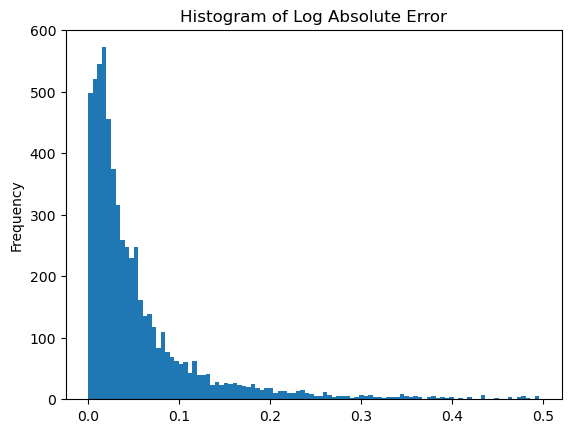

In [21]:
merged[(merged.bedroomcnt > 2) & (merged.logerror_abs < 0.5)]['logerror_abs'].plot.hist(bins=100, title = 'Histogram of Log Absolute Error');

## Q8

The first bit of code is me getting the data and then saving it as a CSV. You weren't asked to do that part.

In [22]:
regions = quandl.get_table("ZILLOW/REGIONS", paginate=True)
zsfh = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=['1289', '2402', '2694'])
zatt = quandl.get_table('ZILLOW/DATA', indicator_id='ZATT', region_id=['1289', '2402', '2694'])
zabt = quandl.get_table('ZILLOW/DATA', indicator_id='ZABT', region_id=['1289', '2402', '2694'])

In [23]:
regions.to_csv('regions.csv')
zsfh.to_csv('zsfh.csv')
zatt.to_csv('zatt.csv')
zabt.to_csv('zabt.csv')

In [24]:
regions = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/regions.csv')

zsfh = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/zsfh.csv')
zatt = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/zatt.csv')
zabt = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/zabt.csv')


In [25]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   None         89305 non-null  int64 
 1   region_id    89305 non-null  int64 
 2   region_type  89305 non-null  object
 3   region       89305 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


In [26]:
zsfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   None          920 non-null    int64  
 1   indicator_id  920 non-null    object 
 2   region_id     920 non-null    int64  
 3   date          920 non-null    object 
 4   value         920 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 36.1+ KB


In [27]:
regions = regions.drop('None', axis=1)
zsfh = zsfh.drop('None', axis=1)
zatt = zatt.drop('None', axis=1)
zabt = zabt.drop('None', axis=1)

regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region_id    89305 non-null  int64 
 1   region_type  89305 non-null  object
 2   region       89305 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [28]:
regions[(regions.region_id == 1289) | (regions.region_id == 2402) | (regions.region_id == 2694)]

,region_id,region_type,region
73322,2694,county,Fairfield County; CT; Bridgeport-Stamford-Norw...
77021,2402,county,"Maricopa County; AZ; Phoenix-Mesa-Chandler, AZ"
86119,1289,county,"Orange County; NC; Durham-Chapel Hill, NC"


## Q9

In [29]:
indices = pd.concat((zsfh, zatt, zabt), sort=False, ignore_index=True)  
indices

,indicator_id,region_id,date,value
0,ZSFH,2694,2023-01-31,605655.781796
1,ZSFH,2694,2022-12-31,606152.087047
2,ZSFH,2694,2022-11-30,607121.637262
3,ZSFH,2694,2022-10-31,666604.000000
4,ZSFH,2694,2022-09-30,667014.000000
...,...,...,...,...
2755,ZABT,1289,2000-12-31,116436.000000
2756,ZABT,1289,2000-11-30,115677.000000
2757,ZABT,1289,2000-10-31,114892.000000
2758,ZABT,1289,2000-09-30,114653.000000


## Q10

In [30]:
indices['pct'] = indices.sort_values('date', ascending=True).groupby(['indicator_id', 'region_id']).value.pct_change()
indices


,indicator_id,region_id,date,value,pct
0,ZSFH,2694,2023-01-31,605655.781796,-0.000819
1,ZSFH,2694,2022-12-31,606152.087047,-0.001597
2,ZSFH,2694,2022-11-30,607121.637262,-0.089232
3,ZSFH,2694,2022-10-31,666604.000000,-0.000615
4,ZSFH,2694,2022-09-30,667014.000000,-0.001775
...,...,...,...,...,...
2755,ZABT,1289,2000-12-31,116436.000000,0.006561
2756,ZABT,1289,2000-11-30,115677.000000,0.006833
2757,ZABT,1289,2000-10-31,114892.000000,0.002085
2758,ZABT,1289,2000-09-30,114653.000000,0.003721


In [31]:
605655.781796/606152.087047 - 1

-0.0008187800745154128

In [32]:
indices = indices[indices['indicator_id']=='ZSFH']

indices = indices.drop('indicator_id', axis=1)

indices = pd.pivot(indices, values='pct', columns='region_id', index='date')

indices

region_id,1289,2402,2694
date,,,
1996-01-31,NaN,NaN,NaN
1996-02-29,NaN,0.002794,0.001110
1996-03-31,NaN,0.003167,0.001401
1996-04-30,NaN,0.006091,0.002784
1996-05-31,NaN,0.005882,0.002370
...,...,...,...
2022-09-30,-0.005839,-0.022650,-0.001775
2022-10-31,-0.013335,-0.012272,-0.000615
2022-11-30,-0.087740,-0.012301,-0.089232


In [33]:
indices = indices.rename(columns = {1289:'Orange_NC', 2402:'Maricopa_AZ', 2694:'Fairfield_CT'})


In [34]:
indices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 1996-01-31 to 2023-01-31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Orange_NC     269 non-null    float64
 1   Maricopa_AZ   324 non-null    float64
 2   Fairfield_CT  324 non-null    float64
dtypes: float64(3)
memory usage: 10.2+ KB


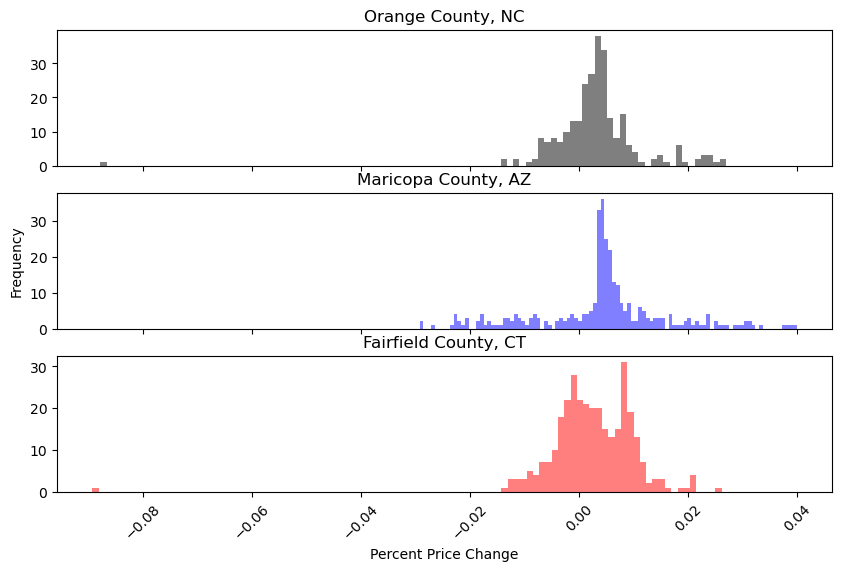

In [35]:

fig, axs = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(10, 6))

axs[0].hist(indices['Orange_NC'], bins=100, color='k', alpha=0.5)
axs[1].hist(indices['Maricopa_AZ'], bins=100, color='b', alpha=0.5)
axs[2].hist(indices['Fairfield_CT'], bins=100, color='r', alpha=0.5)

axs[2].set_xlabel('Percent Price Change')

axs[1].set_ylabel('Frequency')

axs[0].set_title('Orange County, NC', fontsize = 12)
axs[1].set_title('Maricopa County, AZ', fontsize = 12)
axs[2].set_title('Fairfield County, CT', fontsize = 12)

axs[2].ticklabel_format(axis='x', style='plain')

axs[2].tick_params(axis='x', rotation=45);
